# Project: Investigating No-Show Medical Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#datacleaning">Data Cleaning</a>  </li>  
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a><H1>Introduction</H1>

<font size='4'>This project consists of around 100k records of appointment data from Brazil's public hospitals. The main aim of this project is to investigate if there exists a relationship between various columns of the dataset and most importantly find if a patient shows up for his scheduled appointment.
<br>   
    <font size='4'><b> Interested to find </b></font>: No Shows<br><br>
<font size='4'><b>Variables considered for Investigation</b> :
<br>   
<li>1.Age
<li>2.Gender
<li>3.Various Health issues(Alcoholism, Diabetes, Hypertension)
<li>4.Disabilities/Handicaps
<li>5.Sms received
<li>6.Patients with multiple appointments
<li>7.Neighbourhood
<li>8.Appointment Date </font>

<font size='4'><b> Questions Posed: </b>
  <li>  1. Does a patient with multiple appointments with multiple number of show ups in  the past effect the future probability of showing up?
  <li>  2. Can Age be a factor in determining the No shows?
  <li>  3. Which days see the most number of no shows?
  <li>  4. Do diseases and disabilities play a part in affecting the no shows?
  <li>  5. Can sending an sms increase the chances of people showing up for their appointment?
  <li>  6. Does Neighbourhood play a role in the number of shows vs no shows? 
  <li>  7. Does a person under a certain age group suffering from an ailment affect the number of no shows?  
  <li>  8. Does the appointment day increase or decrease the number of no shows?

<a id='wrangling'></a>
## Data Wrangling



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   

In [20]:
app=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [21]:
# Check the number of rows and columns in data
app.shape

(110527, 14)

In [22]:
#Summary statistics of data
app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [23]:
#Check the first few rows of data
app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [24]:
# Get a general overview of data
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [25]:
# Renaming No-show column for ease of understanding
app.rename(columns={'No-show':'Showed up'},inplace=True)

In [26]:
#Converting Showed up column to int
app['Showed up'].replace({'No':1, 'Yes':0},inplace=True)

In [27]:
# There don't seem to be any null values,so we go ahead and check if there are any duplicate records
sum(app.duplicated())

0

In [28]:
#Checking datatypes of every variable
app.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
Showed up           int64
dtype: object

In [29]:
#Checking ScheduledDay and Appointment day columns datatypes closely
type(app['ScheduledDay'][0])

str

In [30]:
type(app['AppointmentDay'][0])

str

In [31]:
#Converting them into dateandtime format for analysis later
app['ScheduledDay'] = pd.to_datetime(app['ScheduledDay'])
app['AppointmentDay'] = pd.to_datetime(app['AppointmentDay'])

In [32]:
type(app['ScheduledDay'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
#Checking the datatype of Neighbourhood
type(app['Neighbourhood'][0])

str

In [34]:
app['AppointmentDay'].describe()

count                        110527
unique                           27
top       2016-06-06 00:00:00+00:00
freq                           4692
first     2016-04-29 00:00:00+00:00
last      2016-06-08 00:00:00+00:00
Name: AppointmentDay, dtype: object

Seems like the data recorded are from a very less time. We can see that the data ranges between 29/04/2016 and 08/06/2016

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A6DB36C18>,
      dtype=object)

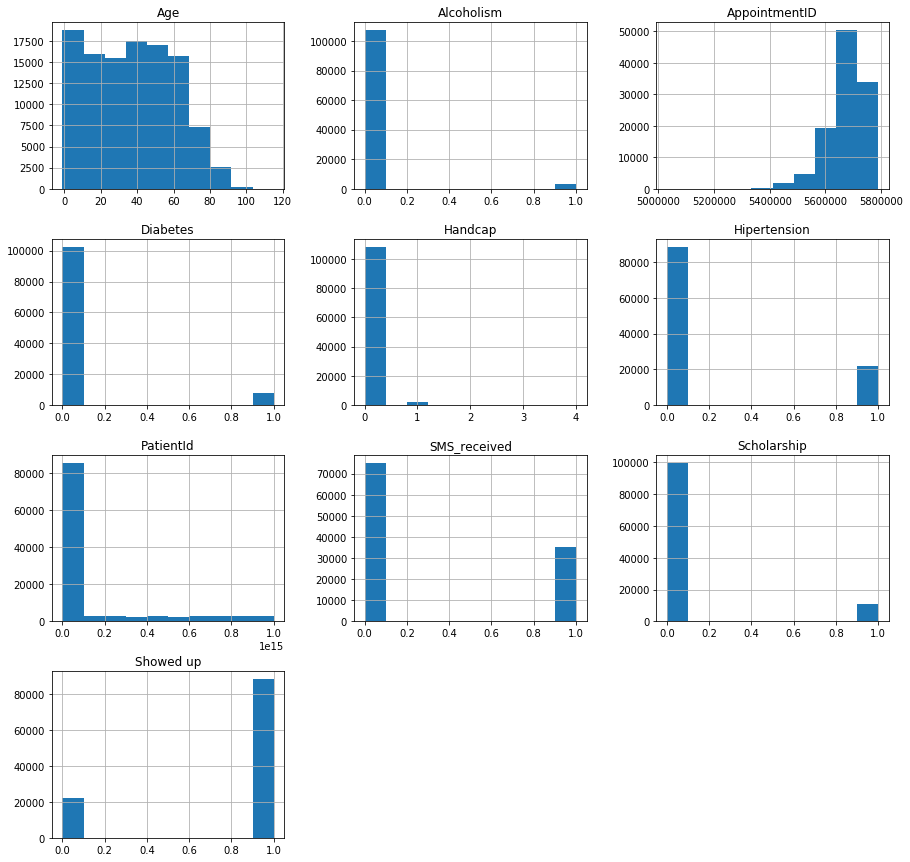

In [35]:
#Plotting histograms for every variable to get an overview of data
app.hist(figsize=(15,15))

# Preliminary observations from histogram and summary statistics


<a id='datacleaning'></a>
# Data Cleaning

In [36]:
#Checking values of Age column as we saw the min values to be -1 and some values were 0. Though '0' can be the age if it is an infant and high ages are possible as well.
#Dropping only values below 0
# Checking ages of people.
app['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [37]:
#Fetching row where Age==-1
age_neg = app.loc[app['Age']==-1]
age_neg

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed up
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [38]:
#Dropping the row where Age==-1
index_age=app.loc[app['Age']==-1].index
app.drop(index_age , inplace=True)
app.shape

(110526, 14)

In [39]:
# calculate days between Scheduled and appointment dates and create a new column named gap
app['ScheduledDay'] = pd.to_datetime(app['ScheduledDay'])
app['AppointmentDay'] = pd.to_datetime(app['AppointmentDay'])


In [40]:
#Adding a gap column with difference between Scheduled and Appointment day
app['gap'] = (app['AppointmentDay'] - app['ScheduledDay'])
app['gap']=app['gap'].dt.days

In [41]:
#Checking if the new column gap is added
app.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed up,gap
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,-1


In [42]:
app['gap'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: gap, dtype: float64

In [43]:
#Checking the count of duration gap <0
app[app['gap']<0].count()

PatientId         38567
AppointmentID     38567
Gender            38567
ScheduledDay      38567
AppointmentDay    38567
Age               38567
Neighbourhood     38567
Scholarship       38567
Hipertension      38567
Diabetes          38567
Alcoholism        38567
Handcap           38567
SMS_received      38567
Showed up         38567
gap               38567
dtype: int64

There are around 38k negative durations which do not make much sense since only after scheduling an appointment, one can go to visit the doctor. One of the reasons for having negative gap can be due to mistyping.
We are going to keep them for now and will drop them when we plot a visualization graph.

<a id='eda'></a>
## Exploratory Data Analysis

In [44]:
#Creating masks for Showed up column
df_yes=app[app['Showed up']== 1]
df_no=app[app['Showed up']== 0]

# 1. Check Relationship between Patient IDs with multiple appointments and No shows


After looking at the dataset,there can be a possibility of one patient having multiple Appointment IDs. Objective is to check if a relationship can be established between patient IDs and show up.For example, if one patient has 3 appointments and he showed up every time, there are high chances of him showing up in the next appointment.

In [45]:
#Finding count of values grouping count of every column by Patient Id and using df_yes for the same
count_yes=df_yes.groupby('PatientId').count()
count_yes.head(10)
#count_yes.shape

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed up,gap
PatientId,,,,,,,,,,,,,,
3.921784e+04,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4.374176e+04,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9.377953e+04,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.417242e+05,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5.376153e+05,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.183186e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.263866e+07,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5.216894e+07,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5.422400e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [46]:
# storing values of appointment id ==1 in a new dataframe
app1=df_yes.groupby(df_yes['PatientId']).count()
yesequals=app1[app1['AppointmentID']==1]
yesequals.head(10)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed up,gap
PatientId,,,,,,,,,,,,,,
3.921784e+04,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4.374176e+04,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9.377953e+04,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.417242e+05,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5.376153e+05,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.183186e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5.422400e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6.143378e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6.249793e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [47]:
#checking number of rows and columns
yesequals.shape

(35709, 14)

In [48]:
#Extracting number of rows for visualization later
ye=yesequals.shape
ye[0]


35709

In [49]:
#splitting df_yes data with appointmentID > 1 in yesgreater dataframe
app1=df_yes.groupby(df_yes['PatientId']).count()
yesgreater=app1[app1['AppointmentID']>1]
yesgreater.head(3)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed up,gap
PatientId,,,,,,,,,,,,,,
22638656.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
52168938.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2
79228495.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [50]:
yesgreater.shape

(18444, 14)

In [51]:
#extracting rows for later visualization
yg=yesgreater.shape
yg[0]

18444

In [52]:
#grouping masked'df_no' dataset based on PatientId to check the count of appointments for each Patient
count_no=df_no.groupby('PatientId').count()
count_no.head()
count_no.shape

(17663, 14)

In [53]:
#splitting masked df_no data with appointmentID = 1 in a new dataframe
app2=df_no.groupby(df_no['PatientId']).count()
no_equals=app2[app2['AppointmentID']==1]
no_equals.head(3)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed up,gap
PatientId,,,,,,,,,,,,,,
5628261.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
64851211.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
87996454.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [54]:
no_equals.shape

(14437, 14)

In [55]:
#extracting rows for later use
ne=no_equals.shape
ne[0]

14437

In [56]:
#Splitting masked dataframe df_no with appointmentID>1  and storing in a new dataframe
app2=df_no.groupby(df_no['PatientId']).count()
no_greater=app2[app2['AppointmentID']>1]
no_greater.head(3)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed up,gap
PatientId,,,,,,,,,,,,,,
1.224513e+08,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5.225847e+08,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2.237714e+09,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [57]:
no_greater.shape

(3226, 14)

In [58]:
#Extracting row for later visualization
ng=no_greater.shape
ng[0]

3226

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A6AEDCEF0>,
      dtype=object)

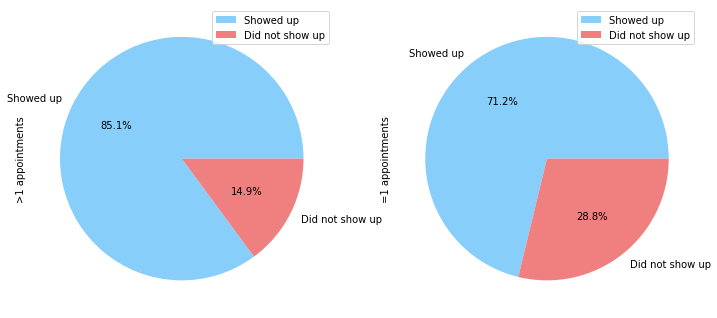

In [59]:
#For ease of undertanding, creating an empty dataset and filling row count obtained from yes_equals.shape
#yes_greater.shape,no_equals.shape,no.greater.shape where Yes ='Showed up', no = 'Did not show up'

df = pd.DataFrame(columns=['Showed up', 'Did not show up'],index=['>1 appointments','=1 appointments'])
df.loc['>1 appointments'] = [yg[0] ,ng[0]]
df.loc['=1 appointments'] = [ye[0] ,ne[0]]
df1=df.transpose()
colors = ['lightskyblue', 'lightcoral']
df1.plot.pie(subplots=True, figsize=(12, 12),autopct='%1.1f%%',colors=colors,legend=True)


From the above graph, we can say that the person who is booking an appointment for first time is twice as likely to not show up in the future than the person who has had multiple appointments before.

# 2. Checking relationship between Age and Show up columns


In [60]:
#Binning data with a difference of 25 and finding the count of ages under each bracket of bin in masked df_yes dataframe
bins=[0,25,50,75,100,125]
yes=df_yes.groupby(pd.cut(df_yes['Age'],bins)).size()
yes

Age
(0, 25]       26881
(25, 50]      28730
(50, 75]      25174
(75, 100]      4518
(100, 125]        4
dtype: int64

In [61]:
#Following a similar pattern for masked 'df_no' dataframe
bins=[0,25,50,75,100,125]
no=df_no.groupby(pd.cut(df_no['Age'],bins)).size()
no

Age
(0, 25]       8179
(25, 50]      7774
(50, 75]      4857
(75, 100]      867
(100, 125]       3
dtype: int64

In [62]:
#Creating an empty dataframe and filling them with values of size(bin) obtained above from df_yes and df_no dataframes

df_age = pd.DataFrame(index=['(0-25)','(25-50)','(50-75)','(75-100)','(100-125)'],columns=['Showed up','No Show'])
df_age.loc['(0-25)'] = [26881 ,8179]
df_age.loc['(25-50)'] = [28730 ,25174]
df_age.loc['(50-75)'] = [25174 ,4518]
df_age.loc['(75-100)'] = [4518 ,867]
df_age.loc['(100-125)']= [4,3]
               
df_age_copy=df_age.transpose()
df_age_copy

,(0-25),(25-50),(50-75),(75-100),(100-125)
Showed up,26881,28730,25174,4518,4
No Show,8179,25174,4518,867,3


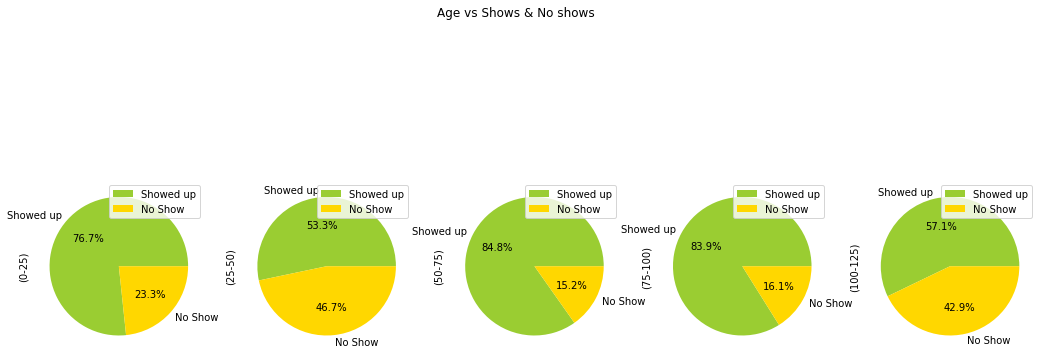

In [63]:
#Plotting all the bins to see the trends of shows vs no shows
colors = ['yellowgreen', 'gold']
df_age_copy.plot.pie(subplots=True, figsize=(18, 19),autopct='%1.1f%%',colors=colors,legend=True,title='Age vs Shows & No shows ')
plt.subplots_adjust(bottom=0.7)

From the above pie charts, it is clearly visible that people of the age group 25 to 50 and 100-125 have a remarkably high no-show rate as compared to other ages. Of course, number of people in the age group of (100-125) are less, so they can be ignored .

# Gender vs Show up relationship 

Text(0.5, 1.0, 'Gender vs Shows & No Shows')

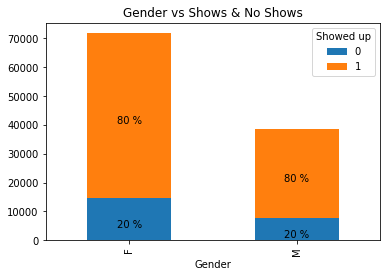

In [64]:
app1 = app[['Showed up', 'Gender']]

df_gender = pd.pivot_table(app1,index=["Showed up"],values=["Gender"], columns=["Gender"], aggfunc = len)

ax = df_gender.T.plot(kind='bar',stacked=True)
k = 0
l = len(ax.patches)
p0 = np.zeros(l)
p1 = np.zeros(l)
m = int(l/2)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    p0[k] = height
    k = k+1

    
for i in range(l):
    if i>=m:
        p1[i] = p0[i]/(p0[i] + p0[i-m])
    if i<m:
        p1[i] = p0[i]/(p0[i] + p0[i+m])

j=0    
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.000f} %'.format(p1[j]*100), 
            horizontalalignment='center', 
            verticalalignment='top')
    j = j+1

plt.title('Gender vs Shows & No Shows')



From the above bar graph, there is nothing much we can conclude about Gender vs No show since both Males and Females in the entire dataset are equally divided in terms of their no shows. 

# Relationship between different diseases and Showed up

In [65]:
#Investigate 'Handcap' column 
app['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

From the above result, seems like 0 stands for 'No handicap' and '1 - 4' for people having 1 or more physical disabilities. For the purpose of analysis, we add up all the values with people having any disability and make it as 1.Hence, we end up with two values (0 and 1) where 0 stands for 'No Handicap' and 1 for 'Handicap'.

In [66]:
#Replace 1,2,3,4 of Handcap column with 1
app['Handcap'].replace([1,2,3,4],1, inplace=True)
app['Handcap'].value_counts()


0    108285
1      2241
Name: Handcap, dtype: int64

<Figure size 432x288 with 0 Axes>

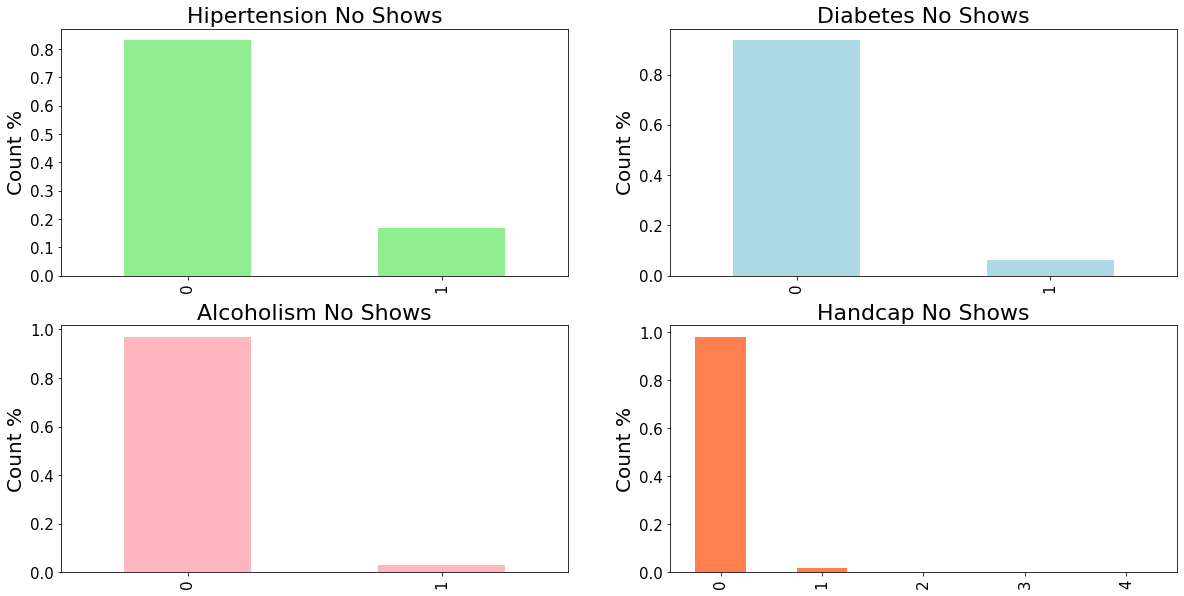

In [67]:
#Plotting the No shows with respect to diseases
plt.figure(1)
plt.figure(figsize = (15,10))
diseases = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
colour = ['lightgreen','Lightblue','lightpink','coral']
i = 0
for col in diseases:    
    plt.subplot(int(str(22)+str((diseases.index(col)+1))))
    df_no[col].value_counts(normalize=True).plot.bar(figsize=(20,10), fontsize = 15.0, color = colour[i])
    plt.title(col+' '+ 'No Shows', fontsize = 22.0)
    plt.ylabel('Count %', fontsize = 20.0)
    i = i +1

From the above graphs, we observe the following:
1. Around 20% of people are suffering from Hypertension and still do not show up for their appointments
2. Around 10% suffer from Diabetes and end up not showing for their appointments
3. About 5% suffer from Alcoholism and don't show up for their appointments
4. Similar to Alcoholism, about 5% have some form disability and don't show up for their scheduled appointments

# Comparing Neighbourhood and No Shows

In [68]:
#Getting the value count of each neighbourhood
app['Neighbourhood'].value_counts()
sum(app['Neighbourhood'].value_counts())


110526

In [69]:
#Confirming the datatype of the column
type(app['Neighbourhood'][0])

str

In [70]:
#Creating a dataframe which consists of count of Neighbourhood values of masked df_yes and df_no dataframes 
neighbour_y=df_yes['Neighbourhood'].value_counts()
neighbour_n=df_no['Neighbourhood'].value_counts()
# Checking the first few rows of neighbour_y
neighbour_y.head(10)

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
CENTRO             2631
ITARARÉ            2591
TABUAZEIRO         2559
SANTO ANTÔNIO      2262
BONFIM             2223
Name: Neighbourhood, dtype: int64

In [71]:
#Checking the first few rows of neighbour_no
neighbour_n.head(10)

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
Name: Neighbourhood, dtype: int64

Text(0.5, 0, 'Neighbourhood')

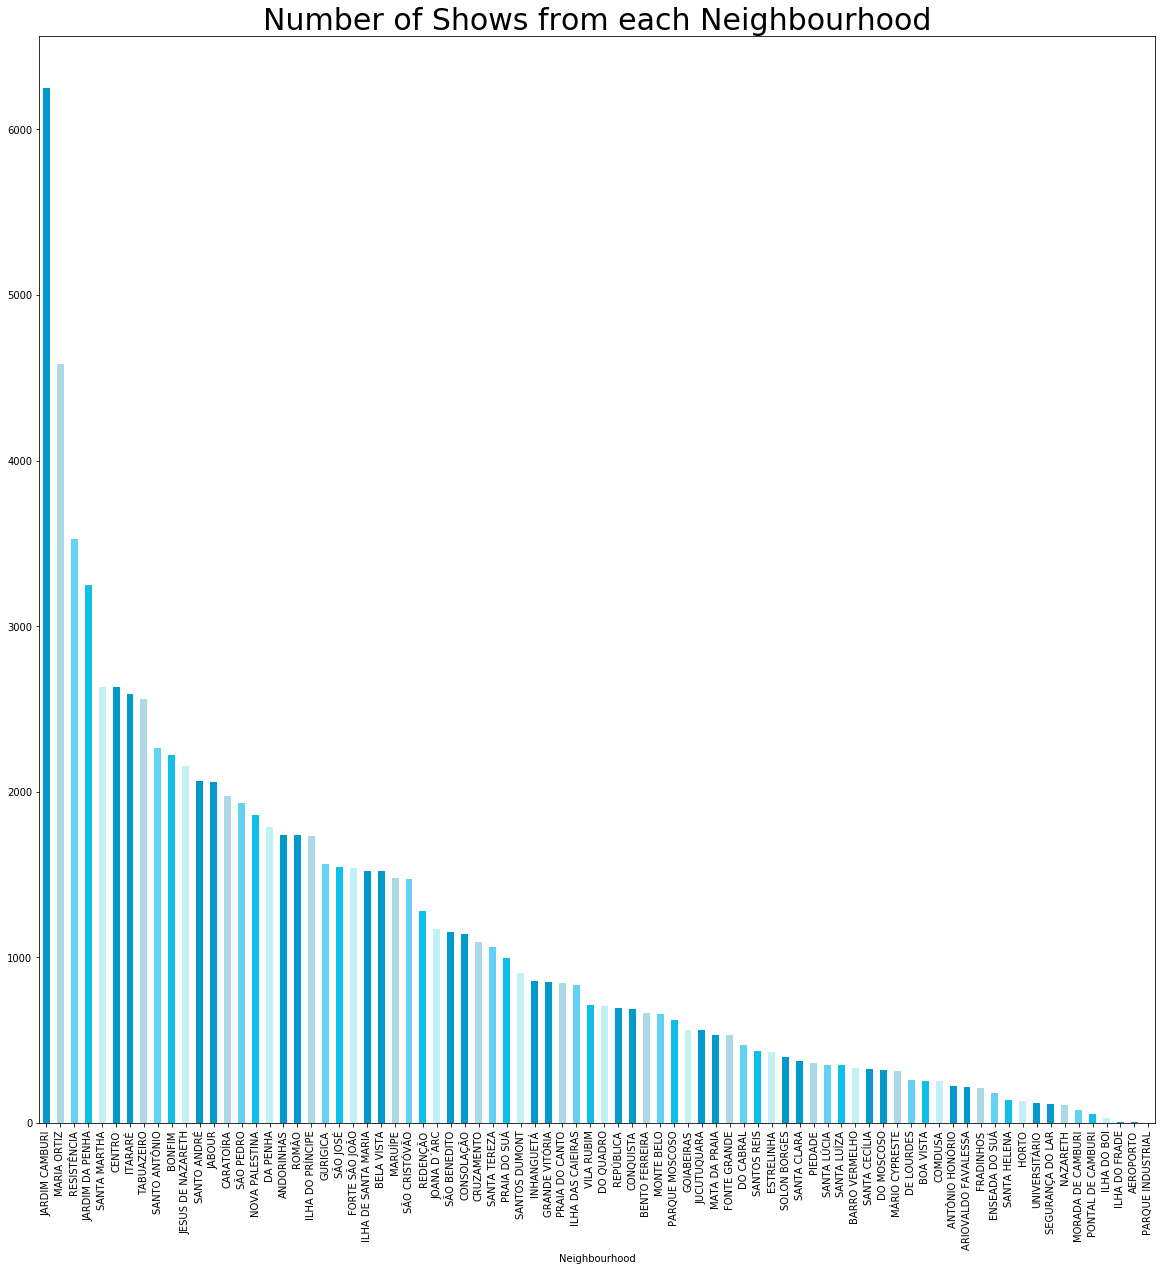

In [72]:
fig, ax = plt.subplots(figsize = (20,20))
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']

df_yes['Neighbourhood'].value_counts().plot(kind='bar',color=color_palette_list)
ax.set_title("Number of Shows from each Neighbourhood",fontsize=30)

ax.set_xlabel("Neighbourhood")



Text(0.5, 0, 'Neighbourhood')

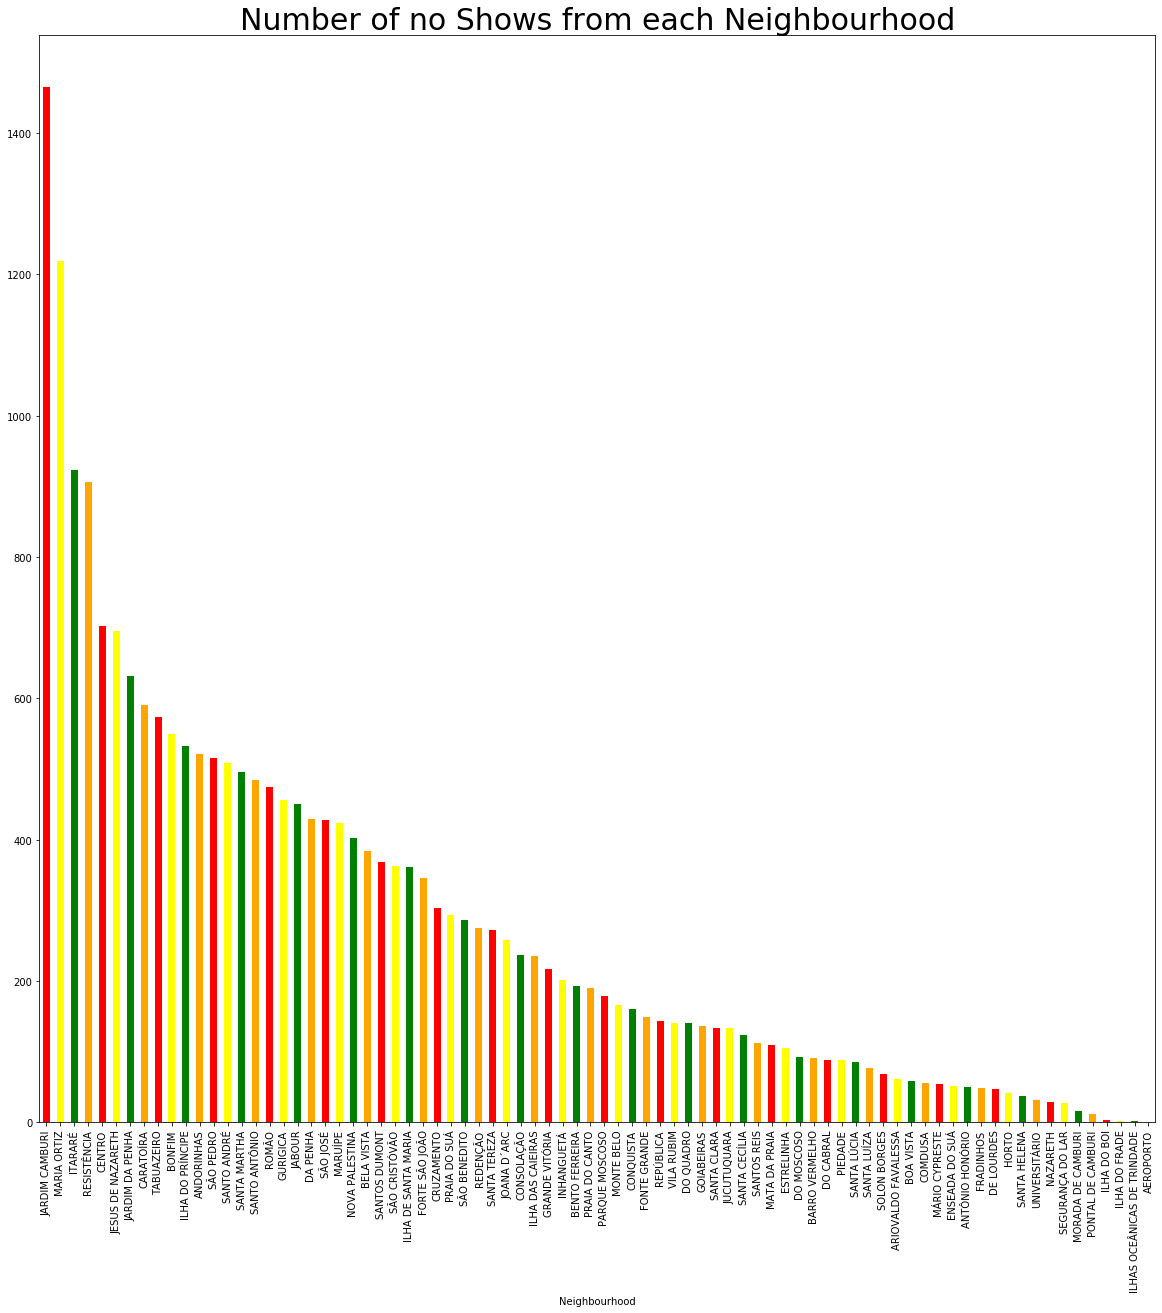

In [73]:
fig, ax = plt.subplots(figsize = (20,20))
color_palette_list = [ 'Red', 'yellow', 'green','Orange']
df_no['Neighbourhood'].value_counts().plot(kind='bar',color=color_palette_list)
ax.set_title("Number of no Shows from each Neighbourhood",fontsize=30)
ax.set_xlabel("Neighbourhood")


From the above graph, we can see that the neighbourhood 'Jardim Camburi' has the highest number of no shows followed by Maria Ortiz and the rest.

# Comparing Appointment Days and No Shows

In [74]:
#Looking aat the value counts of each dates
app['AppointmentDay'].value_counts()

2016-06-06 00:00:00+00:00    4691
2016-05-16 00:00:00+00:00    4613
2016-05-09 00:00:00+00:00    4520
2016-05-30 00:00:00+00:00    4514
2016-06-08 00:00:00+00:00    4479
2016-05-11 00:00:00+00:00    4474
2016-06-01 00:00:00+00:00    4464
2016-06-07 00:00:00+00:00    4416
2016-05-12 00:00:00+00:00    4394
2016-05-02 00:00:00+00:00    4376
2016-05-18 00:00:00+00:00    4373
2016-05-17 00:00:00+00:00    4372
2016-06-02 00:00:00+00:00    4310
2016-05-10 00:00:00+00:00    4308
2016-05-31 00:00:00+00:00    4279
2016-05-05 00:00:00+00:00    4273
2016-05-19 00:00:00+00:00    4270
2016-05-03 00:00:00+00:00    4256
2016-05-04 00:00:00+00:00    4168
2016-06-03 00:00:00+00:00    4090
2016-05-24 00:00:00+00:00    4009
2016-05-13 00:00:00+00:00    3987
2016-05-25 00:00:00+00:00    3909
2016-05-06 00:00:00+00:00    3879
2016-05-20 00:00:00+00:00    3828
2016-04-29 00:00:00+00:00    3235
2016-05-14 00:00:00+00:00      39
Name: AppointmentDay, dtype: int64

In [75]:
#Get the count of appointment days in df_no masked dataframe(No Shows dataframe)
day_no_show=df_no['AppointmentDay'].dt.weekday_name.value_counts()
day_no_show

Tuesday      5152
Wednesday    5093
Monday       4690
Friday       4037
Thursday     3338
Saturday        9
Name: AppointmentDay, dtype: int64

In [76]:
day_show_up=df_yes['AppointmentDay'].dt.weekday_name.value_counts()
day_show_up

Wednesday    20774
Tuesday      20488
Monday       18024
Friday       14982
Thursday     13909
Saturday        30
Name: AppointmentDay, dtype: int64

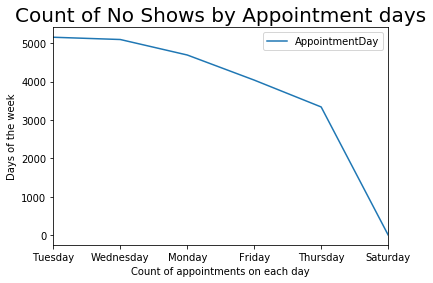

In [77]:
#plotting a line chart to check the trend of no shows by appointment days
day_no_show.plot(kind='line')
#ax.set_title("Number of no Shows by appointment Days",fontsize=30)
plt.title('Count of No Shows by Appointment days',fontsize=20)
plt.ylabel('Days of the week')
plt.xlabel('Count of appointments on each day')
plt.legend()

We observe from the above graph that Thursdays have the least no shows and Tuesdays, Wednesdays have relatively high No shows.One of the reasons can be the days being start and mid of the week.
From the value count of each day, the number of appointments for Saturday is negligiblle hence, we don't take the weekend into account.

In [78]:
#We have already seen that the gap column has negative values and they need to be dropped for better analysis. We are going to
#use df_no dataframe since we are interested in the shows
app1 = app.drop(app.index[app.gap < 0])
app1=app1['gap'].groupby(app1['Showed up']).value_counts().unstack()
app1=app1.T
app1.rename(columns={0: 'No Show', 1: 'Showed'}, inplace=True)
app1.describe()
#app1['gap'].plot(kind='line',figsize=(15,6))

Showed up,No Show,Showed
count,110.000000,123.000000
mean,186.563636,418.186992
std,306.281861,873.667129
min,1.000000,1.000000
25%,8.250000,7.000000
50%,35.500000,61.000000
75%,268.250000,447.000000
max,1602.000000,5123.000000


Text(0, 0.5, 'Number of appointments')

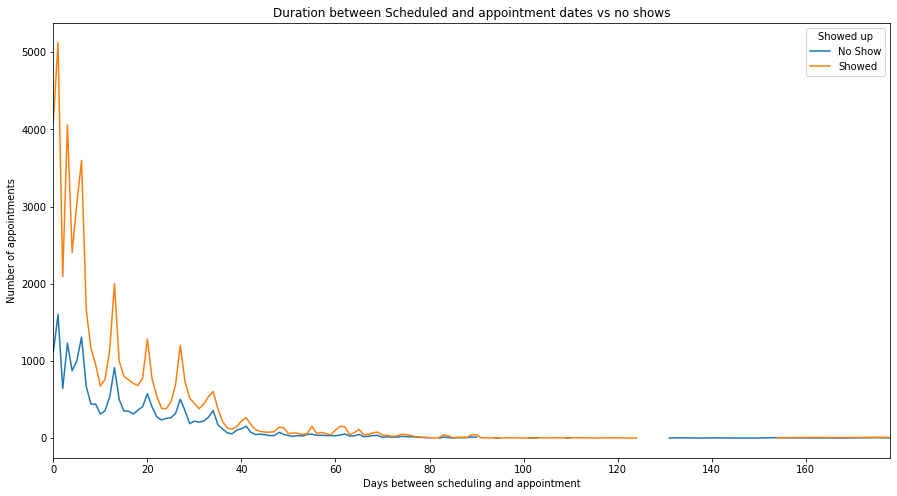

In [79]:
#Plot a graph visually to see the trend 
app1.plot(kind='line',figsize=(15,8), title= 'Duration between Scheduled and appointment dates vs no shows')
plt.xlabel('Days between scheduling and appointment')
plt.ylabel('Number of appointments')

We can see from the above graph that the number of shows are greater between 0 and 5 days and they gradually decrese after 10 days. This is a good datapoint that can help predicting the number of no shows using scheduled and appointment days.


# Comparing SMS sent and No shows 

In [80]:
no_sms=df_no['SMS_received'].value_counts()
no_sms

0    12535
1     9784
Name: SMS_received, dtype: int64

In [81]:
yes_sms=df_yes['SMS_received'].value_counts()
yes_sms

0    62509
1    25698
Name: SMS_received, dtype: int64

In [82]:
#Creating a dataframe and adding the values of sms received and not received from masked df_yes and df_no dataframes

df_sms= pd.DataFrame(index=['Showed up', 'No Show'],columns=['SMS Received','Did not receive SMS'])
df_sms.loc['Showed up'] = [ yes_sms[1],yes_sms[0]]
df_sms.loc['No Show'] = [no_sms[1] ,no_sms[0]]
df_sms


,SMS Received,Did not receive SMS
Showed up,25698,62509
No Show,9784,12535


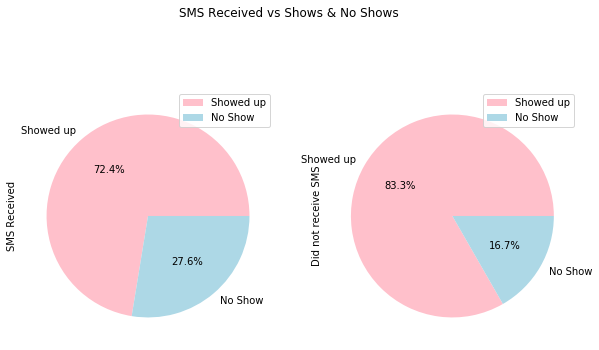

In [83]:
#Plotting the pie charts for SMS Received
df_sms.plot.pie(subplots=True,figsize=(10,10),autopct='%1.1f%%',colors=('pink','lightblue'),legend=True,title='SMS Received vs Shows & No Shows ')
plt.subplots_adjust(bottom=0.5)

From the above pie charts , it is clear that irrespective of sending an SMS, people end up not turning up on the day of appointments.
Hence, there is not much of a relationship between sms received and no shows.

# Comparison between Diseases, Ages and their no shows 
We have already compared no shows with respect to ailment type for the entire population and it did not yield any significant trends. It might be worthwhile to do a further breakdown by age group.

In [84]:
#Creating a new column with bins of ages to the original dataframe
bins=[0,25,50,75,100,125]
app['df_age_bins']=pd.cut(app['Age'],bins)
app.head(3)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed up,gap,df_age_bins
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,-1,"(50, 75]"
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,-1,"(50, 75]"
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,-1,"(50, 75]"


In [85]:
#Creating a new masked dataframe df_no_new which consists of values 'Showed up'==0 and also includes the column df_age_bins
df_no_new=app[app['Showed up']==0]
df_no_new.head(3)
df_no_new.groupby(['df_age_bins'])['Hipertension'].value_counts()


df_age_bins  Hipertension
(0, 25]      0               8145
             1                 34
(25, 50]     0               6872
             1                902
(50, 75]     0               2597
             1               2260
(75, 100]    1                576
             0                291
(100, 125]   0                  3
Name: Hipertension, dtype: int64

In [86]:
#Creating a new masked dataframe df_yes_new which consists of values 'Showed up'==1 and also includes the column df_age_bins
df_yes_new=app[app['Showed up']==1]
df_yes_new.groupby(['df_age_bins'])['Hipertension'].value_counts()

df_age_bins  Hipertension
(0, 25]      0               26793
             1                  88
(25, 50]     0               24792
             1                3938
(50, 75]     0               13934
             1               11240
(75, 100]    1                2762
             0                1756
(100, 125]   0                   3
             1                   1
Name: Hipertension, dtype: int64

In [87]:
#Filtering the diseases by age bracket using masked dataframe no only considering no shows data 
df_no_new.groupby(['df_age_bins'])['Hipertension','Alcoholism','Diabetes','Handcap'].sum().unstack()


              df_age_bins
Hipertension  (0, 25]          34
              (25, 50]        902
              (50, 75]       2260
              (75, 100]       576
              (100, 125]        0
Alcoholism    (0, 25]          39
              (25, 50]        361
              (50, 75]        275
              (75, 100]         2
              (100, 125]        0
Diabetes      (0, 25]          29
              (25, 50]        287
              (50, 75]        916
              (75, 100]       198
              (100, 125]        0
Handcap       (0, 25]          97
              (25, 50]        112
              (50, 75]        133
              (75, 100]        62
              (100, 125]        3
dtype: int64

In [88]:
#reframing the dataframe and calling it df2
df2 = df_no_new.groupby(['df_age_bins'])['Hipertension','Alcoholism','Diabetes','Handcap'].sum().unstack()
df2 = pd.DataFrame(df2)
df2 = df2.reset_index()
df2

,level_0,df_age_bins,0
0,Hipertension,"(0, 25]",34
1,Hipertension,"(25, 50]",902
2,Hipertension,"(50, 75]",2260
3,Hipertension,"(75, 100]",576
4,Hipertension,"(100, 125]",0
5,Alcoholism,"(0, 25]",39
6,Alcoholism,"(25, 50]",361
7,Alcoholism,"(50, 75]",275
8,Alcoholism,"(75, 100]",2
9,Alcoholism,"(100, 125]",0


In [89]:
#Rename column names
df2.rename(columns={'level_0': 'Ailment/Disability', 0: 'count'}, inplace=True)
df2

,Ailment/Disability,df_age_bins,count
0,Hipertension,"(0, 25]",34
1,Hipertension,"(25, 50]",902
2,Hipertension,"(50, 75]",2260
3,Hipertension,"(75, 100]",576
4,Hipertension,"(100, 125]",0
5,Alcoholism,"(0, 25]",39
6,Alcoholism,"(25, 50]",361
7,Alcoholism,"(50, 75]",275
8,Alcoholism,"(75, 100]",2
9,Alcoholism,"(100, 125]",0


Text(0.5, 1.0, 'No Shows vs People of every age bracket suffering from a disease')

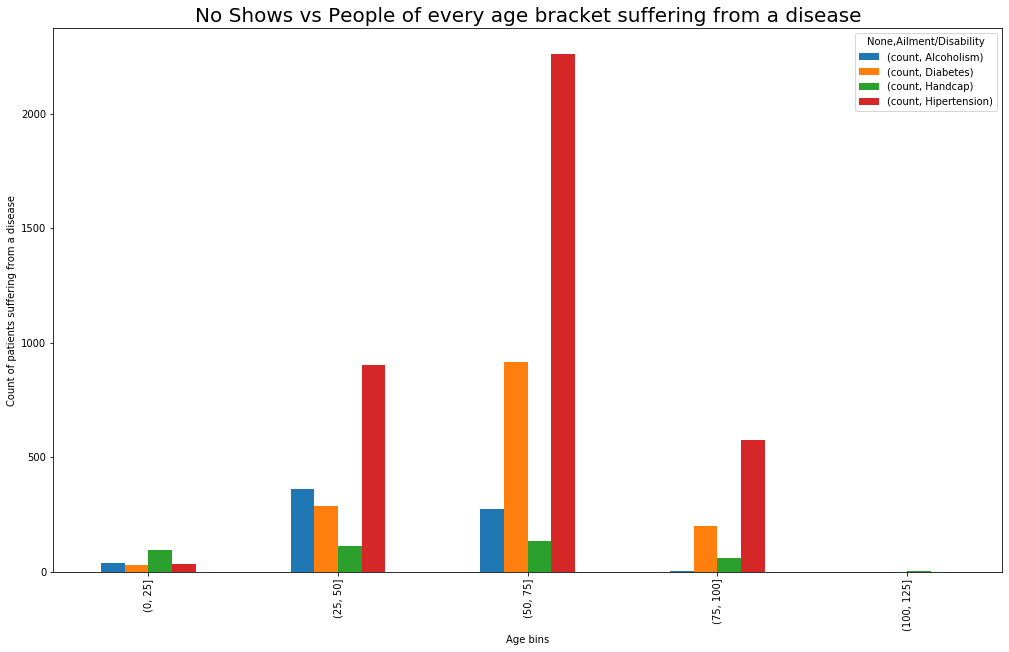

In [90]:
#Plotting a grouped bar graph
from matplotlib.pyplot import *
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig, ax = subplots()
mylabels=['Hipertension','Alcoholism','Diabetes','Handcap']
df2.groupby(['df_age_bins','Ailment/Disability']).sum().unstack().plot(kind='bar',stacked=False,ax=ax)
plt.xlabel('Age bins')
plt.ylabel('Count of patients suffering from a disease')

plt.title('No Shows vs People of every age bracket suffering from a disease',fontsize=20)


In [91]:
df2['percentage']=df2.groupby(['Ailment/Disability'])['count'].transform(lambda x: x/x.sum()*100)
df2

,Ailment/Disability,df_age_bins,count,percentage
0,Hipertension,"(0, 25]",34,0.901379
1,Hipertension,"(25, 50]",902,23.913043
2,Hipertension,"(50, 75]",2260,59.915164
3,Hipertension,"(75, 100]",576,15.270414
4,Hipertension,"(100, 125]",0,0.000000
5,Alcoholism,"(0, 25]",39,5.760709
6,Alcoholism,"(25, 50]",361,53.323486
7,Alcoholism,"(50, 75]",275,40.620384
8,Alcoholism,"(75, 100]",2,0.295421
9,Alcoholism,"(100, 125]",0,0.000000


From the above charts, we are most interested to know the percentage of people having a disease and not showing up for their appointments. From the bar graphs, we see that around 60% of people suffering from hypertension in the age group (50-75) and around 64% of people suffering from Diabetes in the age group(50-75) and 41% suffering from alcoholism in the same age range do not show up for their appointments.


# Limitations

<li>1.The above analysis are mostly 2 dimensional. For better prediction of no shows, multivariate analysis must be performed which can be done using statistical models.</li>
<li>2.Some of the column data doesn't make sense like Age being negative or the difference between Scheduled and appointment day turning out negative which leads to wrong analysis</li>
<li>3.The dataset has records of a very short duration. This will not be enough to predict the no shows.</li>

<a id='conclusions'></a>
## Conclusions

  <li>  1. Ages between 25 and 50 tend to miss their appointments more than the rest of the age groups.
  <li>  2. Gender does not seem to play any major role in the number of no shows.
  <li>  3. Regarding patients with multiple appointments, we can infer that a person who is booking an appointment for first  time is twice as likely not to show up for his appointment than the person who has had multiple appointments before.  
  <li>  4. Irrespective of sending an SMS, people end up not turning up on the day of appointments. Hence, there is no improvement observed in the amount of show ups after they receive an sms.
  <li>  5. Comparing No shows with Scheduled day appointment, Thursdays seem to have less number of no shows. Although this is a nice datapoint to have, it does not give any actionable insights.
  <li>  6. Neighbourhood 'Jardim Camburi' has the highest number of no shows followed by Maria Ortiz and the rest.    
  <li>  6. There seems to be no correlation between the type of ailment and no show rate while applied to the entire population. 
  <li>  7. In particular, Diabetic ,Hypertension and Alcoholic patients in the age group '50-75' have a very high no show rate. One of the inferences could be that these ailments are not regarded severely or simply not enough awareness exists.
  <li>  8. The number of no shows tend to be higher as the duration between Scheduled date and Appointment date increases.

References : stackoverflow,matplotlib documentation, github